In [3]:
import numpy as np
import scipy.integrate as ode
import random as rd
import matplotlib.pyplot as plt


In [ ]:


def attractor(t,z):
    x,y,p=z
    a0x=0.01
    a0z=0.01
    a0y=0.01
    dx=1
    dp=1
    dy=1
    ax=1
    ap=1
    ay=1
    kyx=1
    kxp=1
    kxy=1
    kpy=1
    n=2.5
    dxdt=a0x-dx*x+ax/(kyx**n+y**n)
    #dpdt=a0z-dp*p+ap*x**n/(kxp**n+x**n)
    dydt=a0y-dy*y+ay*(x**n/(kxy**n+x**n))
    """ +ay*(kpy**n+p**n) """
    return [dxdt, dydt, dpdt]

""" def oscil_original(t,z):
    s,h,ms,mh=z
    as0=
    as=
    kh=
    ks=
    dm=
    dh=
    ds=
    n1=
    n2=
    b=
    dmsdt=as0+as*h**n1/(kh**n1+h**n1)-dm*ms
    dmhdt=as0+as*ks**n2/(ks**n2+s**n2)-dh*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h """

z0=[0.5,0.5,0.5]
time=10
timespan=[0,time]
results=ode.solve_ivp(attractor, timespan, z0, t_eval=np.linspace(0, time, 10000), method='RK45')
x=results.y[0]
y=results.y[1]
p=results.y[2]
t=results.t
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='X',color='red')
plt.plot(t, p, label='P',color='blue')
plt.plot(t, y, label='Y',color='green')
plt.title('Attractor')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

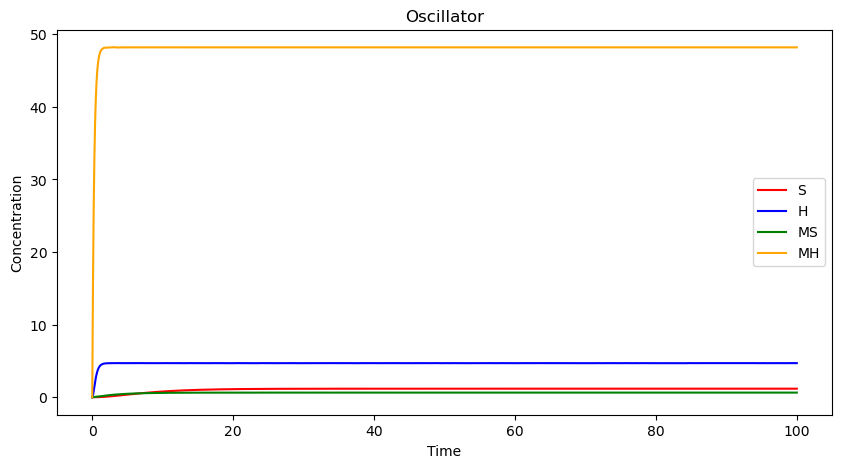

In [13]:
def oscil_original(t,z):
    s,h,ms,mh=z
    as0=0.1
    ah0=0.1
    a_s=30.5
    ah=183
    kh=326
    ks=185
    dm=0.3
    dh=3.8
    ds=0.2
    n1=3
    n2=4.8
    b=3.7
    dmsdt=as0+a_s*(h**n1)/(kh**n1+h**n1)-dm*ms
    dmhdt=ah0+ah*(ks**n2)/(ks**n2+s**n2)-dh*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h
    return [dsdt, dhdt, dmsdt, dmhdt]
z0=[0,0,0,0]
time=100
timespan=[0,time]
results=ode.solve_ivp(oscil_original, timespan, z0, t_eval=np.linspace(0, time, time*100), method='RK45')
s=results.y[0]/10
h=results.y[1]/10
ms=results.y[2]
mh=results.y[3]
t=results.t
plt.figure(figsize=(10, 5))
plt.plot(t, s, label='S',color='red')
plt.plot(t, h, label='H',color='blue')
plt.plot(t, ms, label='MS',color='green')
plt.plot(t, mh, label='MH',color='orange')
plt.title('Oscillator')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [ ]:
def solve(y0,y,dt):
    s,h,ms,mh=y0
    as0=0.1
    ah0=0.1
    a_s=30.5
    ah=183
    kh=326
    ks=185
    dm=0.3
    dh=3.8
    ds=0.2
    n1=3
    n2=4.8
    b=3.7
    dmsdt=as0+a_s*h**n1/(kh**n1+h**n1)-dm*ms
    dmhdt=ah0+ah*ks**n2/(ks**n2+s**n2)-dh*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h
    return [dsdt, dhdt, dmsdt, dmhdt]
    dy = f(0,y)
    y=y0 + dy * dt
    return y
time=100
dt=0.001
y_record=np.zeros((time/dt+1,4))
y_record[0]=[0,0,1,1]
t=np.linspace(0, time, int(time/dt)+1)
for i in range(1, int(time/dt)+1):
    y_record[i]=euler(oscil_original, y_record[i-1], dt)
s=y_record[:,0]
h=y_record[:,1]
ms=y_record[:,2]
mh=y_record[:,3]
plt.figure(figsize=(10, 5))
plt.plot(t, s, label='S',color='red')
plt.plot(t, h, label='H',color='blue')
plt.plot(t, ms, label='MS',color='green')
plt.plot(t, mh, label='MH',color='orange')
plt.title('Oscillator')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [ ]:
from ddeint import ddeint

# 定义延迟微分方程
def model(Y, t, delay):
    # Y(t - delay) 代表获取 t - delay 时刻的函数值
    return -0.5 * Y(t) + 0.3 * Y(t - delay)

# 定义历史函数（初始时刻的值）
def history(t):
    # 假设在 0 到 2 秒内初始值为 1.0
    return 1.0

# 定义时间范围
t_span = np.linspace(0, 100, 1000)
delay = 2.0

# 求解延迟微分方程
solution = ddeint(model, history, t_span, fargs=(delay,))

# 绘制结果
plt.plot(t_span, solution)
plt.xlabel('Time (s)')
plt.ylabel('Y(t)')
plt.title('DDE Solution with 2s Delay')
plt.show()

In [ ]:
from ddeint import ddeint
import numpy as np
import matplotlib.pyplot as plt

# 定义延迟微分方程组
def model(Y, t, delays):
    delay1, delay2 = delays
    # Y[0](t - delay1) 和 Y[1](t - delay2) 分别代表获取 t - delay1 和 t - delay2 时刻的函数值
    # 这里假设方程组有两个变量 Y0 和 Y1
    dY0dt = -0.5 * Y[0](t) + 0.3 * Y[0](t - delay1)
    dY1dt =  0.2 * Y[1](t)  - 0.1 * Y[1](t - delay2)
    return [dY0dt, dY1dt]

# 定义历史函数
def history(t):
    # 假设在初始时刻 Y0 和 Y1 的值都为 1.0
    return [1.0, 1.0]

# 定义时间范围
t_span = np.linspace(0, 100, 1000)
delays = (2.0, 5.0)  # 指定两个延迟时间：2 秒和 5 秒

# 求解延迟微分方程组
solution = ddeint(model, history, t_span, fargs=(delays,))

# 绘制结果
plt.plot(t_span, solution[:, 0], label='Y0(t)')
plt.plot(t_span, solution[:, 1], label='Y1(t)')
plt.xlabel('Time (s)')
plt.ylabel('Y(t)')
plt.title('DDE Solution for System with Multiple Delays')
plt.legend()
plt.show()